In [1]:
# !pip install xgboost

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, minmax_scale
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
fruits=pd.read_csv("E:/Python Programs/fruits.csv")
X = fruits[["sphericity"]]
y = fruits["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [6]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train), dt_model.score(X_test, y_test)

(0.9111111111111111, 0.6666666666666666)

In [7]:
ada_model = AdaBoostClassifier(n_estimators=24, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1))
ada_model.fit(X_train, y_train)
ada_model.score(X_train, y_train), ada_model.score(X_test, y_test)

(1.0, 0.8)

In [8]:
len(ada_model.estimators_)

24

In [9]:
estimators = ada_model.estimators_
estimators

[DecisionTreeClassifier(criterion='entropy', max_depth=1,
                        random_state=1630605246),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=265685421),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=208034258),
 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                        random_state=1884827306),
 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                        random_state=1293452415),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=967170715),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=529688566),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=690252510),
 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                        random_state=1616124016),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=441855500),
 DecisionTreeClassifier(criterion='entropy', max_depth=1,
            

In [12]:
estimators[0].score(X_test, y_test), estimators[1].score(X_test, y_test), estimators[2].score(X_test, y_test)

(0.6666666666666666, 1.0, 0.26666666666666666)

In [13]:
estimators[3].score(X_test, y_test), estimators[4].score(X_test, y_test), estimators[5].score(X_test, y_test)

(0.7333333333333333, 0.13333333333333333, 0.7333333333333333)

In [14]:
estimators[6].score(X_test, y_test), estimators[7].score(X_test, y_test), estimators[8].score(X_test, y_test)

(0.26666666666666666, 0.7333333333333333, 0.26666666666666666)

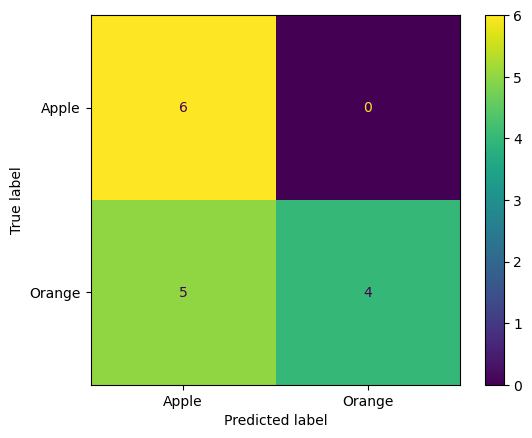

In [16]:
ConfusionMatrixDisplay.from_estimator(estimators[0], X_test, y_test)
plt.show()

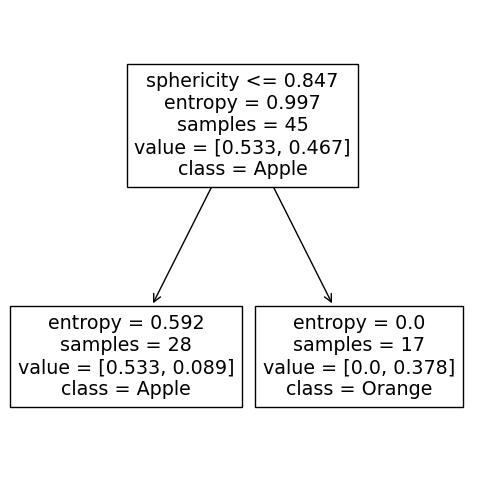

In [18]:
plt.figure(figsize=[6,6])
plot_tree(estimators[0], feature_names=X.columns, class_names=ada_model.classes_)
plt.show()

In [19]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
X = wisc[["radius_mean", "concave points_mean", "concavity_mean"]]
y = wisc["diagnosis"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10, stratify=y)
X_train.shape, X_test.shape

((426, 3), (143, 3))

In [22]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train), dt_model.score(X_test, y_test)

(1.0, 0.8951048951048951)

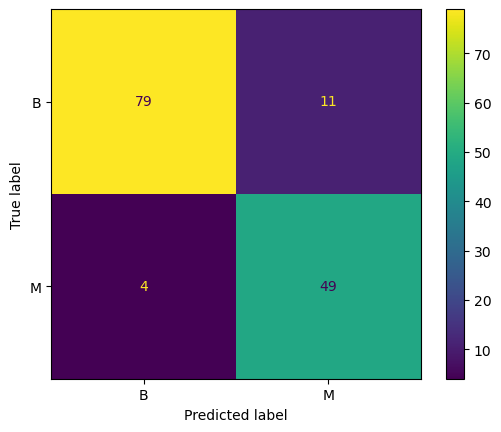

In [35]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.show()

In [33]:
ada_model = AdaBoostClassifier(n_estimators=25, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=11))
ada_model.fit(X_train, y_train)
ada_model.score(X_train, y_train), ada_model.score(X_test, y_test)

(1.0, 0.9090909090909091)

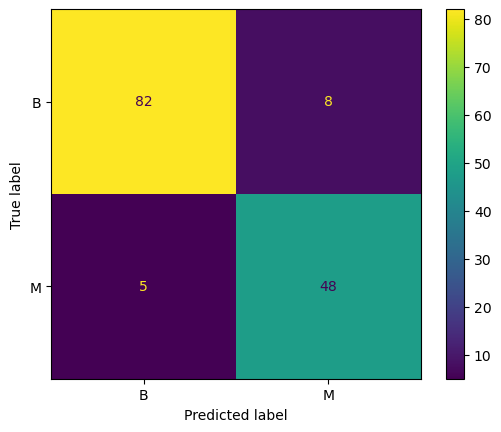

In [34]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)
plt.show()

In [36]:
ada_model=AdaBoostClassifier(n_estimators=25,estimator=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=4))
ada_model.fit(X_train, y_train)
ada_model.score(X_train, y_train), ada_model.score(X_test, y_test)

(1.0, 0.916083916083916)

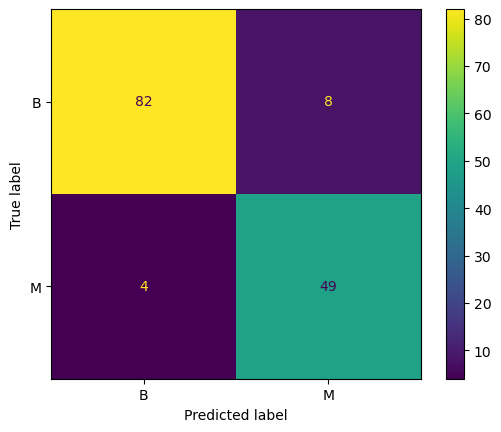

In [37]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)
plt.show()